In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson

# Nuclear counting statistics
## 1. Statistics of background counts
As the every counter have their own dead time so we need to wait a bit to take the count from the counter. This applies to GM counter also. I have taken the counts of the background(i.e, without the radioactive source) for 10 sec each.

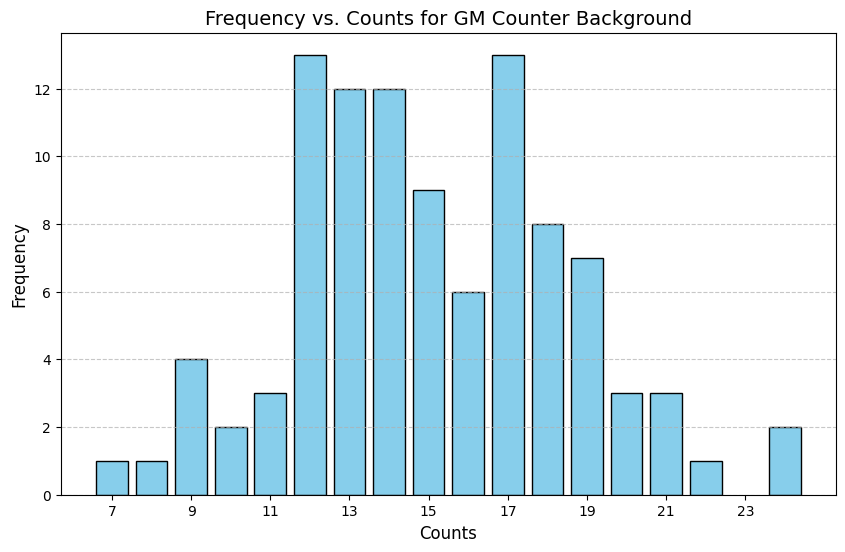

In [2]:
# GM counter background data
data = [
    24, 21, 13, 18, 20, 17, 14, 17, 19, 17, 12, 11, 14, 15, 15, 14, 19, 13, 22, 13, 
    20, 17, 15, 13, 13, 14, 10, 24, 13, 15, 9, 13, 21, 15, 18, 17, 12, 16, 17, 14, 
    18, 16, 12, 18, 17, 14, 12, 13, 12, 16, 15, 13, 15, 17, 14, 13, 11, 18, 12, 17, 
    20, 14, 12, 16, 19, 18, 18, 14, 12, 9, 17, 9, 14, 17, 19, 12, 12, 14, 17, 10, 
    15, 17, 19, 16, 9, 13, 21, 16, 12, 12, 8, 18, 19, 12, 14, 19, 7, 15, 13, 11
]

# Count frequency of each value
counts = Counter(data)
x, y = zip(*sorted(counts.items()))  # Sort by count values

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue', edgecolor='black')
plt.xticks(range(min(x), max(x)+1, 2))
plt.xlabel('Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency vs. Counts for GM Counter Background', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This the plot of frequency vs counts. Now I have to fit it say Poisson distribution.
$$f(x, A, \mu) = A \frac{e^{-\mu}\mu^x}{x!}$$
$A$ will be amplitude, $\mu$ will be the mean. 

But the problem is the factotial is defined for positive integers. So the `curve_fit` does not work. To by pass the problem I used the `posson.pmf`(probability mass function). Actually the factorial is defined here from the **gamma function**.
$$n! = \int_o^{\infty}x^ne^{-x} dx$$
Which clearly shows that the factorial can be defined as continous function. If the integral is not sloved analytically then the numerical technique can be used to do!


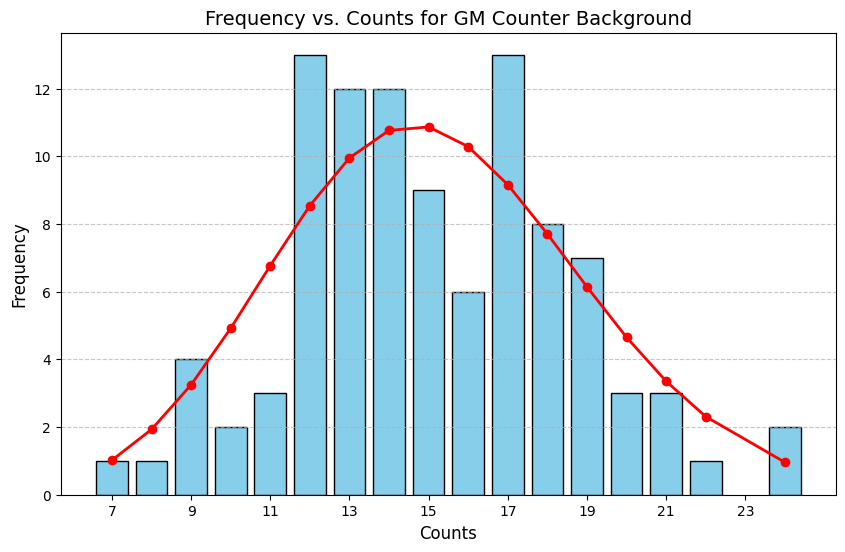

In [3]:
def Poisson(x, A, mu):
    return A * poisson.pmf(x, mu)

# Fit a Gaussian curve to the data
popt, pcov = curve_fit(Poisson, x, y, p0=[7, 18]) # p0 are the initial guesses for A, mu, sigma
Aopt, muopt = popt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue', edgecolor='black')
plt.plot(x, Poisson(x, *popt), "-o",color='red', lw=2)
plt.xticks(range(min(x), max(x)+1, 2))
plt.xlabel('Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency vs. Counts for GM Counter Background', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
print(f'Amplitude: {Aopt:.2f}')
print(f'Mean: {muopt:.2f}')
print(f'Standard deviation: {np.sqrt(muopt):.2f}') # In Poisson distribution, the standard deviation is the square root of the mean

Amplitude: 106.15
Mean: 15.14
Standard deviation: 3.89


In [5]:
np.sqrt(np.diag(pcov))  # Standard deviation of the parameters

array([9.28450656, 0.48699552])

*Experimentally* the mean was **16.35** and std deviation was **5.03**.

This the plot of frequency vs counts. Now I have to fit it say Gaussian distribution.
$$f(x, A, \mu, \sigma) = A \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
$A$ will be amplitude, $\mu$ will be the mean and $\sigma$ will be the std dev. 


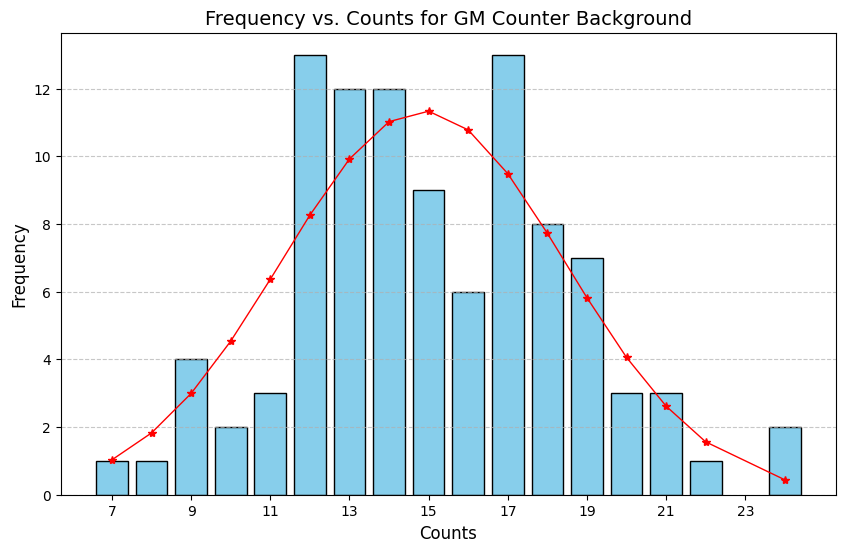

In [6]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Fit a Gaussian curve to the data
popt, pcov = curve_fit(gauss, x, y, p0=[7, 18, 8]) # p0 are the initial guesses for A, mu, sigma
Aopt, muopt, sigmaopt = popt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue', edgecolor='black')
plt.plot(x, gauss(x, *popt), "-*",color='red', lw=1)
plt.xticks(range(min(x), max(x)+1, 2))
plt.xlabel('Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency vs. Counts for GM Counter Background', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
print(f'Amplitude: {Aopt:.2f}')
print(f'Mean: {muopt:.2f}')
print(f'Standard Deviation: {sigmaopt:.2f}')

Amplitude: 11.34
Mean: 14.86
Standard Deviation: 3.59


In [8]:
np.sqrt(np.diag(pcov))  # Standard deviation of the parameters

array([1.26606655, 0.46180815, 0.47784904])

What *I* suppose if the mean is greater than 10 the Poisson distribution tends to Gaussian/Normal($\mu = 0$) distribution(Actually it is popularly known as **Central limit theorem**). As the mean of  background counts is 15.14 so it looks like Normal distribution.

## 2. Counting with $\beta$-source


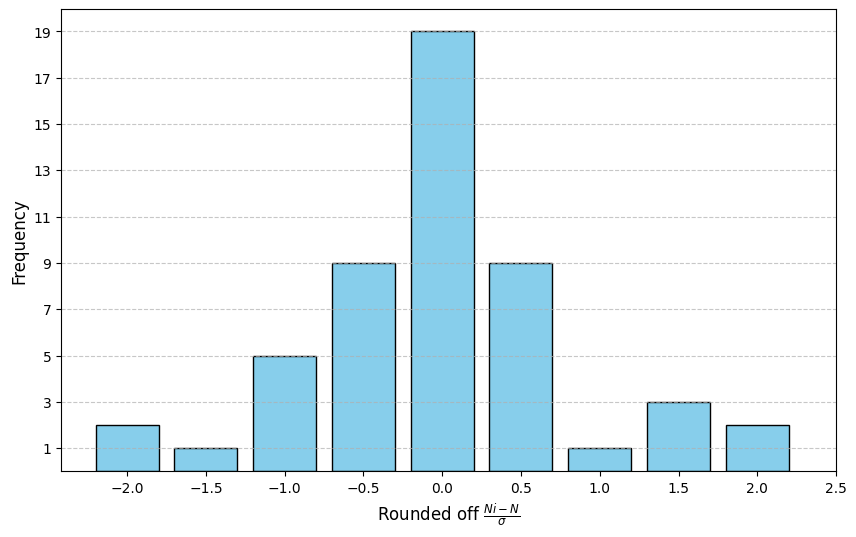

In [12]:
# GM counter source+background counts
data = [
    0, 0, 2, 0.5, 0, 0, -0.5, 0.5, -0.5, 0, 0, 0, -0.5, -0.5, -1.5, 1.5, 0, -1,
    0, 1.5, 0.5, 2, -0.5, 1, -2, 0, -0.5, 0, -0.5, 0, -0.5, -2, 1.5, 0, 0.5, -1,
    -1, 0.5, 0.5, 0, 0, -1, 0.5, 0.5, 0, 0, 0, 0.5, 0, -0.5, -1
]# Roundoff (Ni - N)/sigma

# Count frequency of each value
counts = Counter(data)
x, y = zip(*sorted(counts.items()))  # Sort by count values

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, y,width=0.4 ,color='skyblue', edgecolor='black')
plt.xticks(np.arange(min(x), max(x)+1, 0.5))
plt.yticks(range(min(y), max(y)+1, 2))
plt.xlabel(r'Rounded off $\frac{Ni-N}{\sigma}$', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


$Ni$ is counts in 30 sec \
$N$ is the mean of the data\
$\sigma$ is the experimental std deviation.

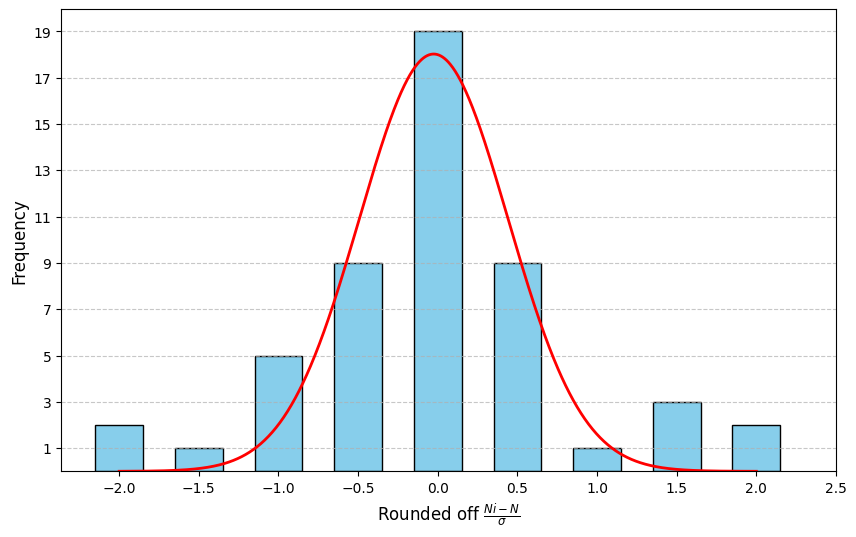

In [10]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Fit a Gaussian curve to the data
popt, pcov = curve_fit(gauss, x, y, p0=[17, 0, 1]) # p0 are the initial guesses for A, mu, sigma
Aopt, muopt, sigmaopt = popt

xx = np.linspace(min(x), max(x), 1000)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, y, width = 0.3, color='skyblue', edgecolor='black')
plt.plot(xx, gauss(xx, *popt),color='red', lw=2)
plt.xticks(range(min(x), max(x)+1, 2))
plt.xticks(np.arange(min(x), max(x)+1, 0.5))
plt.yticks(range(min(y), max(y)+1, 2))
plt.xlabel(r'Rounded off $\frac{Ni-N}{\sigma}$', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
print(f'Amplitude: {Aopt:.2f}')
print(f'Mean: {muopt:.2f}')
print(f'Standard Deviation: {sigmaopt:.2f}')

Amplitude: 18.02
Mean: -0.03
Standard Deviation: 0.47


It is showing that if the number of counts becomes very large than the distributon follows Normal distribution.